In [40]:
import pandas as pd
import numpy as np

In [41]:
data1=pd.read_csv("blackfriday.csv")

In [42]:
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [43]:
#PREPROCESSING SOAL NO.1
np.sum(data1.isnull())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [44]:
data1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [45]:
#Mengatasi Missing Value
data1['Product_Category_2'] = data1['Product_Category_2'].fillna(data1['Product_Category_2'].mean())
data1['Product_Category_3'] = data1['Product_Category_3'].fillna(data1['Product_Category_3'].mean())

np.sum(data1.isnull())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [46]:
data1.to_csv("bfriday1.csv")

In [47]:
bfriday1 = pd.read_csv("bfriday1.csv")

In [48]:
bfriday1.describe()

,Unnamed: 0,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,275033.500000,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,158791.098273,1.727592e+03,6.522660,0.491770,3.936211,4.207852,2.271830,5023.065394
min,0.000000,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,137516.750000,1.001516e+06,2.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,275033.500000,1.003077e+06,7.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,412550.250000,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,550067.000000,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [73]:
bfriday1.head()
bfriday1.shape

(523644, 13)

In [50]:
#Mengatasi outlier
from scipy.stats import stats
z = np.abs(stats.zscore(bfriday1._get_numeric_data()))
print(z)
bfriday1 = bfriday1[(z<3).all(axis=1)]
print(bfriday1.shape)

[[1.73204766e+00 1.75263944e+00 2.94863556e-01 ... 4.22153275e-16
  7.81906541e-16 1.77972902e-01]
 [1.73204136e+00 1.75263944e+00 2.94863556e-01 ... 9.13134028e-01
  5.86205048e-01 1.18175580e+00]
 [1.73203506e+00 1.75263944e+00 2.94863556e-01 ... 4.22153275e-16
  7.81906541e-16 1.56119326e+00]
 ...
 [1.73203506e+00 1.74066623e+00 1.06142262e+00 ... 4.22153275e-16
  7.81906541e-16 1.81701338e+00]
 [1.73204136e+00 1.74182391e+00 1.08494277e+00 ... 4.22153275e-16
  7.81906541e-16 1.77162273e+00]
 [1.73204766e+00 1.74240275e+00 1.23825458e+00 ... 4.22153275e-16
  7.81906541e-16 1.74673750e+00]]
(523644, 13)


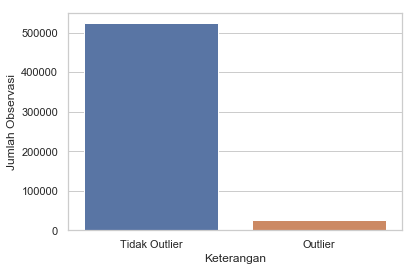

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
c=pd.DataFrame([])
c['Keterangan']=['Tidak Outlier','Outlier']
c['Jumlah Observasi']=[523644,26424] #712 didapat dari 5042-4330=712, 4330=jumlah tanpa outlier
bx = sns.barplot(x='Keterangan',y='Jumlah Observasi',data=c)
plt.show()

In [58]:
bfriday1.shape

(523644, 13)

In [59]:
bfriday1.describe()

,Unnamed: 0,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,523644.000000,5.236440e+05,523644.000000,523644.000000,523644.000000,523644.000000,523644.000000,523644.000000
mean,272940.988676,1.003029e+06,8.074675,0.410265,5.345809,10.093351,12.954539,9274.909734
std,157595.459150,1.727131e+03,6.527142,0.491882,3.637915,4.096234,1.758017,4975.999751
min,0.000000,1.000001e+06,0.000000,0.000000,1.000000,2.000000,6.000000,185.000000
25%,136437.500000,1.001516e+06,2.000000,0.000000,1.000000,8.000000,12.668243,5854.000000
50%,272977.000000,1.003077e+06,7.000000,0.000000,5.000000,9.842329,12.668243,8028.000000
75%,409432.250000,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12.668243,12020.000000
max,545914.000000,1.006040e+06,20.000000,1.000000,17.000000,18.000000,18.000000,23961.000000


In [54]:
bfriday3 = pd.read_csv("bfriday1.csv")

In [55]:
bfriday3.shape

(550068, 13)

In [56]:
bfriday3.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [57]:
bfriday3['Gender'].replace({'F':1,'M':2},inplace=True)
bfriday3['Age'].replace({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7},inplace=True)

In [60]:
bfriday3.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,1,1,10,A,2,0,3,9.842329,12.668243,8370
1,1,1000001,P00248942,1,1,10,A,2,0,1,6.000000,14.000000,15200
2,2,1000001,P00087842,1,1,10,A,2,0,12,9.842329,12.668243,1422
3,3,1000001,P00085442,1,1,10,A,2,0,12,14.000000,12.668243,1057
4,4,1000002,P00285442,2,7,16,C,4+,0,8,9.842329,12.668243,7969


In [61]:
bfriday3['City_Category'].replace({'A':1,'B':2,'C':3},inplace=True)
bfriday3['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)

In [62]:
bfriday3.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,1,1,10,1,2,0,3,9.842329,12.668243,8370
1,1,1000001,P00248942,1,1,10,1,2,0,1,6.000000,14.000000,15200
2,2,1000001,P00087842,1,1,10,1,2,0,12,9.842329,12.668243,1422
3,3,1000001,P00085442,1,1,10,1,2,0,12,14.000000,12.668243,1057
4,4,1000002,P00285442,2,7,16,3,4,0,8,9.842329,12.668243,7969


In [63]:
bfriday4 = bfriday3.drop(columns=['User_ID','Product_ID'])

In [64]:
bfriday4.head()

,Unnamed: 0,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,1,10,1,2,0,3,9.842329,12.668243,8370
1,1,1,1,10,1,2,0,1,6.000000,14.000000,15200
2,2,1,1,10,1,2,0,12,9.842329,12.668243,1422
3,3,1,1,10,1,2,0,12,14.000000,12.668243,1057
4,4,2,7,16,3,4,0,8,9.842329,12.668243,7969


In [65]:
bfriday5=bfriday3[['User_ID','Product_ID']]

In [67]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaler.fit(bfriday4)
bfriday4=pd.DataFrame(scaler.transform(bfriday4), index=bfriday4.index, columns=bfriday4.columns)
bfriday3=pd.concat([bfriday4,bfriday5],axis=1)
bfriday3.head()
print(bfriday3.shape)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(550068, 13)


In [68]:
bfriday3.to_csv("bfridaytrans.csv")

In [69]:
bfridaytrans=pd.read_csv("bfridaytrans.csv")
bfridaytrans.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID,Product_ID
0,0,0.000000,0.0,0.0,0.5,0.0,0.5,0.0,0.105263,0.490146,0.644550,0.348992,1000001,P00069042
1,1,0.000002,0.0,0.0,0.5,0.0,0.5,0.0,0.000000,0.250000,0.733333,0.634181,1000001,P00248942
2,2,0.000004,0.0,0.0,0.5,0.0,0.5,0.0,0.578947,0.490146,0.644550,0.058875,1000001,P00087842
3,3,0.000005,0.0,0.0,0.5,0.0,0.5,0.0,0.578947,0.750000,0.644550,0.043634,1000001,P00085442
4,4,0.000007,1.0,1.0,0.8,1.0,1.0,0.0,0.368421,0.490146,0.644550,0.332248,1000002,P00285442


In [70]:
bfridaytrans.shape

(550068, 14)

In [71]:
bfridaytrans.describe()

,Unnamed: 0,Unnamed: 0.1,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,5.500680e+05
mean,275033.500000,0.500000,0.753105,0.416072,0.403835,0.521320,0.464604,0.409653,0.231804,0.490146,0.644550,0.386320,1.003029e+06
std,158791.098273,0.288676,0.431205,0.225605,0.326133,0.380105,0.322361,0.491770,0.207169,0.262991,0.151455,0.209740,1.727592e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000001e+06
25%,137516.750000,0.250000,1.000000,0.333333,0.100000,0.000000,0.250000,0.000000,0.000000,0.375000,0.644550,0.242641,1.001516e+06
50%,275033.500000,0.500000,1.000000,0.333333,0.350000,0.500000,0.500000,0.000000,0.210526,0.490146,0.644550,0.335505,1.003077e+06
75%,412550.250000,0.750000,1.000000,0.500000,0.700000,1.000000,0.750000,1.000000,0.368421,0.750000,0.644550,0.502818,1.004478e+06
max,550067.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.006040e+06


In [74]:
bfriday1.head()
bfriday1.shape

(523644, 13)

In [75]:
bfriday1.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [76]:
bfriday1

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
5,5,1000003,P00193542,M,26-35,15,A,3,0,1,2.000000,12.668243,15227
6,6,1000004,P00184942,M,46-50,7,B,2,1,1,8.000000,17.000000,19215
7,7,1000004,P00346142,M,46-50,7,B,2,1,1,15.000000,12.668243,15854
8,8,1000004,P0097242,M,46-50,7,B,2,1,1,16.000000,12.668243,15686
9,9,1000005,P00274942,M,26-35,20,A,1,1,8,9.842329,12.668243,7871
